In [ ]:
from datetime import datetime
from typing import Dict, Union

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from ccxt.okx import okx

from siglab_py.util.market_data_util import fetch_candles
from siglab_py.util.analytic_util import compute_candles_stats

ModuleNotFoundError: No module named 'market_data_util'

### Basic Parameters

In [ ]:
# csv file produced by https://github.com/r0bbar/siglab/blob/master/siglab_py/market_data_providers/ccxt_candles_ta_to_csv.py
base_ccy : str = "BTC"
ticker = f"{base_ccy}/USDT:USDT"
candles_with_ta_file : str = f"{base_ccy}_candles_ta.csv"
pd_candles = pd.read_csv(candles_with_ta_file)

### Check a particular field

In [ ]:
pd_candles_ = pd_candles[
                (~pd_candles['normalized_close_short_slope'].isna() ) 
                & (pd_candles.timestamp_ms>=datetime(2025,4,10).timestamp()*1000)
            ]
pd_candles_ = pd_candles_[['datetime', 'normalized_close_short_slope', 'normalized_close_short_slope_idmin', 'normalized_close_short_slope_idmax']]
pd_candles_['datetime'] = pd.to_datetime(pd_candles_['datetime'])
pd_candles_

,datetime,normalized_close_short_slope,normalized_close_short_slope_idmin,normalized_close_short_slope_idmax
11160,2025-04-10 00:00:00,0.129903,11147.0,11160.0
11161,2025-04-10 01:00:00,0.410214,11147.0,11161.0
11162,2025-04-10 02:00:00,0.646511,11147.0,11162.0
11163,2025-04-10 03:00:00,0.869456,11147.0,11163.0
11164,2025-04-10 04:00:00,1.000000,11147.0,11164.0
...,...,...,...,...
11451,2025-04-22 03:00:00,0.434111,11428.0,11434.0
11452,2025-04-22 04:00:00,0.352449,11429.0,11434.0
11453,2025-04-22 05:00:00,0.247154,11430.0,11434.0
11454,2025-04-22 06:00:00,0.115762,11431.0,11434.0


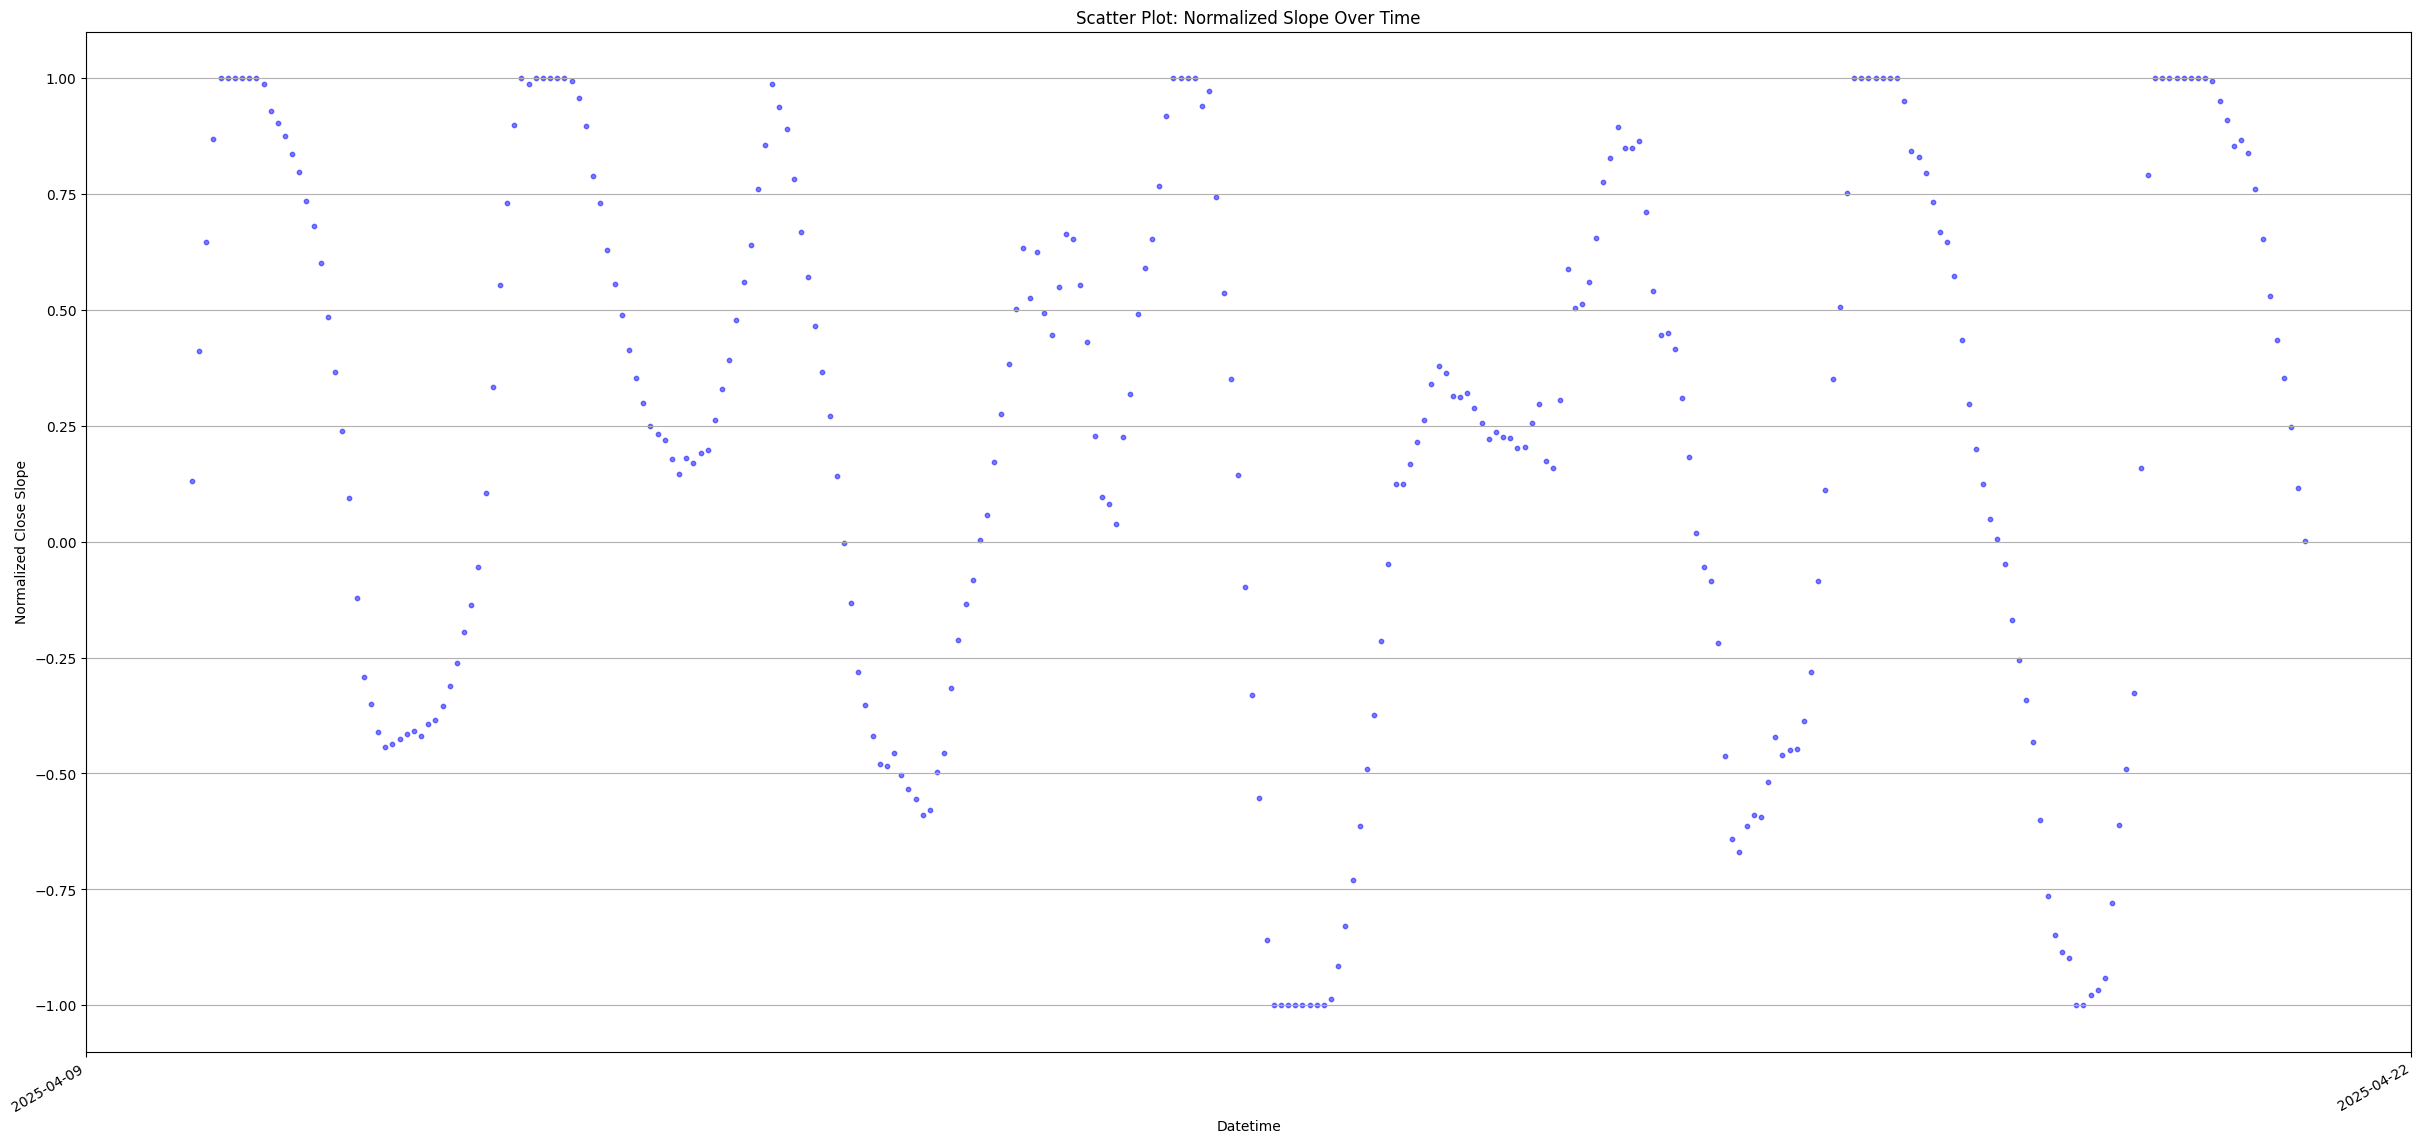

In [ ]:
plt.figure(figsize=(30, 15))
plt.scatter(
    x=pd_candles_['datetime'], 
    y=pd_candles_['normalized_close_short_slope'],
    s=10,
    alpha=0.5,
    color='blue'
)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()
plt.xlabel('Datetime')
plt.ylabel('Normalized Close Slope')
plt.title('Scatter Plot: Normalized Slope Over Time')
plt.grid(True)
plt.show()